Slope (m): 1.6
Intercept (c): 0.2


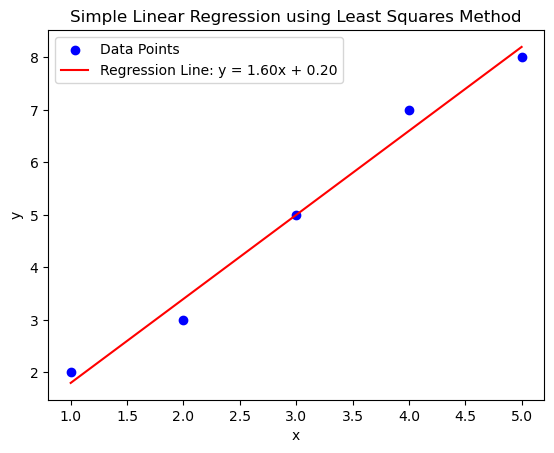

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Given data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 8])

# Number of data points
n = len(x)

# Calculate sums needed for least squares method
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x_squared = np.sum(x ** 2)

# Calculate slope (m) and intercept (c)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
c = (sum_y - m * sum_x) / n

# Print the calculated values of m and c
print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")

# Plotting the data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plotting the regression line
plt.plot(x, m * x + c, color='red', label=f'Regression Line: y = {m:.2f}x + {c:.2f}')

# Labeling the axes
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression using Least Squares Method')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

Starting Gradient Descent...

Epoch 0: m=1.4768, c=1.3640, Cost=50.0083
Epoch 100: m=2.7969, c=4.1847, Cost=0.8069
Epoch 200: m=2.7710, c=4.2141, Cost=0.8066
Epoch 300: m=2.7701, c=4.2151, Cost=0.8066
Epoch 400: m=2.7701, c=4.2151, Cost=0.8066
Epoch 500: m=2.7701, c=4.2151, Cost=0.8066
Epoch 600: m=2.7701, c=4.2151, Cost=0.8066
Epoch 700: m=2.7701, c=4.2151, Cost=0.8066
Epoch 800: m=2.7701, c=4.2151, Cost=0.8066
Epoch 900: m=2.7701, c=4.2151, Cost=0.8066

------------------------------------------------
Final Results: m = 2.7701, c = 4.2151
------------------------------------------------


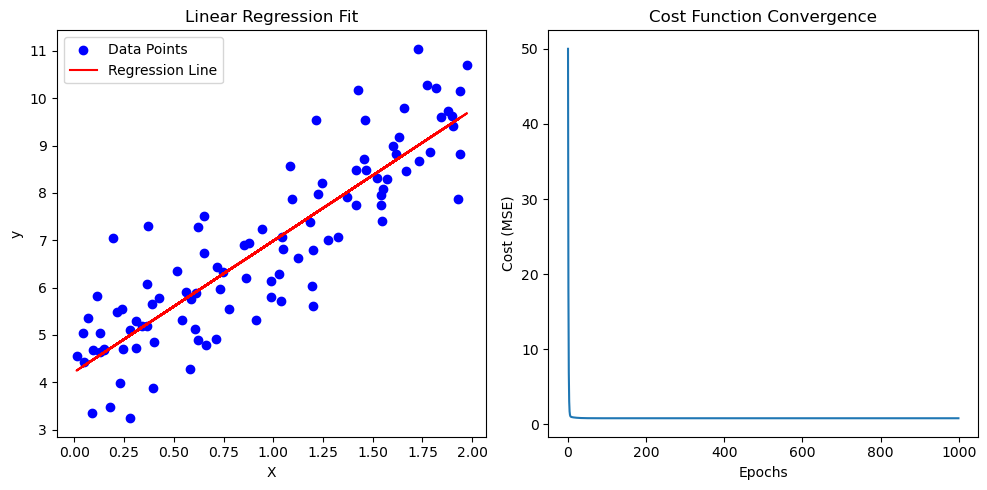

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    """
    Performs gradient descent to find best fit line y = mx + c
    """
    # 1. Initialize parameters (m and c) at 0
    m_curr = 0
    c_curr = 0
    n = len(x)  # Number of data points

    # Lists to store history for visualization (optional)
    cost_history = []

    # 2. Loop for a specified number of iterations (epochs)
    for i in range(epochs):
        # Calculate predicted y based on current m and c
        y_predicted = m_curr * x + c_curr

        # Calculate the cost (Mean Squared Error) for monitoring
        cost = (1/n) * sum([val**2 for val in (y - y_predicted)])
        cost_history.append(cost)

        # 3. Calculate Gradients (Partial Derivatives)
        # derivative wrt m: -(2/n) * sum(x * (y - y_predicted))
        md = -(2/n) * sum(x * (y - y_predicted))
        
        # derivative wrt c: -(2/n) * sum(y - y_predicted)
        cd = -(2/n) * sum(y - y_predicted)

        # 4. Update Parameters using Learning Rate
        m_curr = m_curr - learning_rate * md
        c_curr = c_curr - learning_rate * cd

        # Print progress every 100 epochs
        if i % 100 == 0:
            print(f"Epoch {i}: m={m_curr:.4f}, c={c_curr:.4f}, Cost={cost:.4f}")

    return m_curr, c_curr, cost_history

# --- Main Execution ---

# 1. Generate Synthetic Data
np.random.seed(42)
# Create X values
X = 2 * np.random.rand(100, 1)
# Create Y values (y = 4 + 3x + Gaussian noise)
y = 4 + 3 * X + np.random.randn(100, 1)

# Flatten arrays for easier processing in the loop
X = X.flatten()
y = y.flatten()

# 2. Run Gradient Descent
print("Starting Gradient Descent...\n")
m_final, c_final, cost_hist = gradient_descent(X, y, learning_rate=0.1, epochs=1000)

print("\n------------------------------------------------")
print(f"Final Results: m = {m_final:.4f}, c = {c_final:.4f}")
print("------------------------------------------------")

# 3. Visualization
plt.figure(figsize=(10, 5))

# Plot 1: Data points and Best Fit Line
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, m_final * X + c_final, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

# Plot 2: Cost Function over Time (Convergence)
plt.subplot(1, 2, 2)
plt.plot(cost_hist)
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Convergence')

plt.tight_layout()
plt.show()

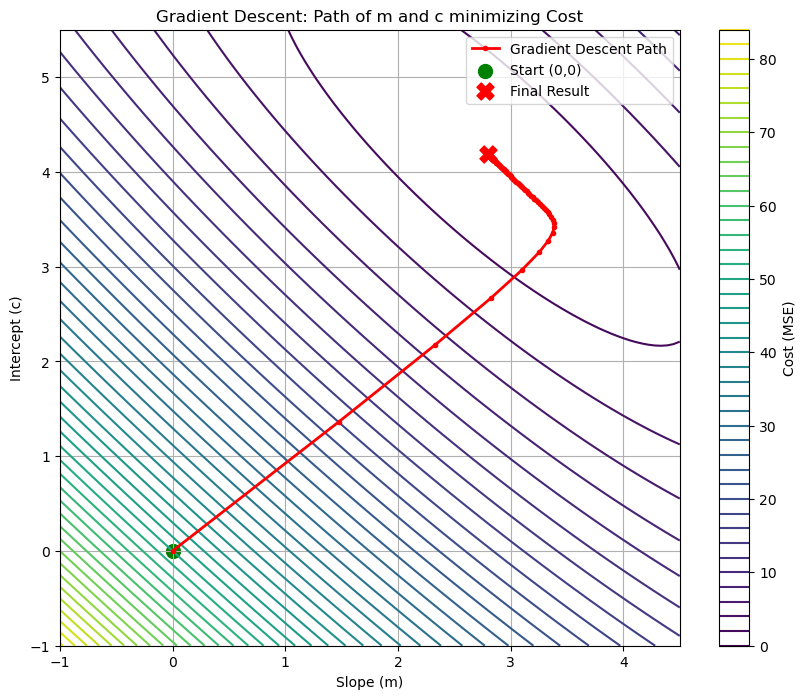

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def compute_cost(X, y, m, c):
    """Calculate Mean Squared Error for given m and c"""
    n = len(y)
    prediction = m * X + c
    return (1/n) * np.sum((y - prediction)**2)

# 1. Generate Synthetic Data
np.random.seed(42)
X = 2 * np.random.rand(100, 1).flatten()
y = 4 + 3 * X + np.random.randn(100).flatten() # True values: c=4, m=3

# 2. Perform Gradient Descent and Track History
m_curr, c_curr = 0, 0   # Start at 0,0
learning_rate = 0.1
epochs = 100
n = len(X)

# Lists to store the history of m, c, and cost
m_history = [m_curr]
c_history = [c_curr]

for i in range(epochs):
    y_pred = m_curr * X + c_curr
    
    # Gradients
    md = -(2/n) * np.sum(X * (y - y_pred))
    cd = -(2/n) * np.sum(y - y_pred)
    
    # Update
    m_curr -= learning_rate * md
    c_curr -= learning_rate * cd
    
    # Store history
    m_history.append(m_curr)
    c_history.append(c_curr)

# 3. Create the Meshgrid for the Contour Plot
# We define a range of m and c values to visualize the "landscape"
m_range = np.linspace(-1, 4.5, 100)
c_range = np.linspace(-1, 5.5, 100)
M, C = np.meshgrid(m_range, c_range)
Z = np.zeros_like(M)

# Calculate cost for every combination of m and c on the grid
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        Z[i, j] = compute_cost(X, y, M[i, j], C[i, j])

# 4. Visualization
plt.figure(figsize=(10, 8))

# Draw the Contour Plot (The "Curve" Landscape)
# These lines represent levels of equal error (like elevation on a map)
cp = plt.contour(M, C, Z, levels=50, cmap='viridis')
plt.colorbar(cp, label='Cost (MSE)')

# Plot the Gradient Descent Path
plt.plot(m_history, c_history, 'r.-', linewidth=2, label='Gradient Descent Path')

# Mark Start and End points
plt.scatter(m_history[0], c_history[0], s=100, c='green', marker='o', label='Start (0,0)')
plt.scatter(m_history[-1], c_history[-1], s=150, c='red', marker='X', label='Final Result')

plt.title('Gradient Descent: Path of m and c minimizing Cost')
plt.xlabel('Slope (m)')
plt.ylabel('Intercept (c)')
plt.legend()
plt.grid(True)
plt.show()

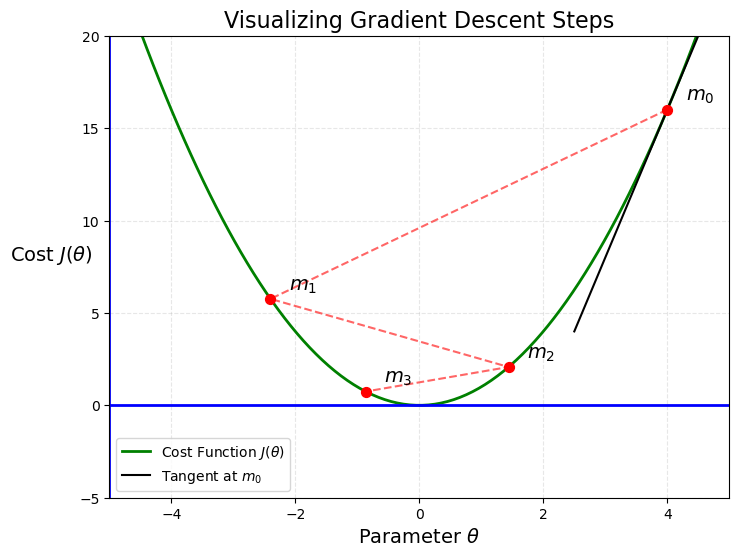

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define Cost Function and its Gradient
def J(theta): return theta**2
def dJ(theta): return 2*theta

# 2. Simulation Parameters
theta_start = 4.0  # This will be our m0
learning_rate = 0.8 # High enough to cause a bounce
iterations = 4

# 3. Run Gradient Descent and store history
thetas = [theta_start]
costs = [J(theta_start)]

theta_curr = theta_start
for _ in range(iterations - 1):
    gradient = dJ(theta_curr)
    theta_curr = theta_curr - learning_rate * gradient
    thetas.append(theta_curr)
    costs.append(J(theta_curr))

# 4. Plotting
plt.figure(figsize=(8, 6))

# Plot the Cost Function Curve
theta_range = np.linspace(-5, 5, 100)
plt.plot(theta_range, J(theta_range), 'g-', linewidth=2, label=r'Cost Function $J(\theta)$')

# Plot the Gradient Descent Path (m0 -> m1 -> m2 -> m3)
plt.plot(thetas, costs, 'r--', alpha=0.6) # Connecting lines
plt.scatter(thetas, costs, color='red', s=50, zorder=5) # The points themselves

# Annotate the points m0, m1, etc.
labels = ['$m_0$', '$m_1$', '$m_2$', '$m_3$']
for i, (t, c) in enumerate(zip(thetas, costs)):
    plt.annotate(labels[i], (t, c), xytext=(t+0.3, c+0.5), fontsize=14)

# Plot the Tangent Line at m0
t0 = thetas[0]
c0 = costs[0]
grad0 = dJ(t0)
# Tangent line equation: y = m(x - x1) + y1
x_tan = np.linspace(t0-1.5, t0+0.5, 10)
y_tan = grad0 * (x_tan - t0) + c0
plt.plot(x_tan, y_tan, 'k-', linewidth=1.5, label='Tangent at $m_0$')

# Final Touches on the Plot
plt.xlabel(r'Parameter $\theta$', fontsize=14)
plt.ylabel(r'Cost $J(\theta)$', fontsize=14, rotation=0, labelpad=20)
plt.title('Visualizing Gradient Descent Steps', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

# Draw the axes like in the sketch
plt.axhline(0, color='blue', linewidth=2)
plt.axvline(-5, color='blue', linewidth=2) # Offset y-axis slightly

plt.xlim(-5, 5)
plt.ylim(-5, 20)
plt.show()

Epoch 20: m = 1.5555, c = 0.3606
Epoch 40: m = 1.5684, c = 0.3142
Epoch 60: m = 1.5775, c = 0.2812
Epoch 80: m = 1.5840, c = 0.2577
Epoch 100: m = 1.5886, c = 0.2411
Epoch 120: m = 1.5919, c = 0.2292
Epoch 140: m = 1.5943, c = 0.2208
Epoch 160: m = 1.5959, c = 0.2148
Epoch 180: m = 1.5971, c = 0.2105
Epoch 200: m = 1.5979, c = 0.2075


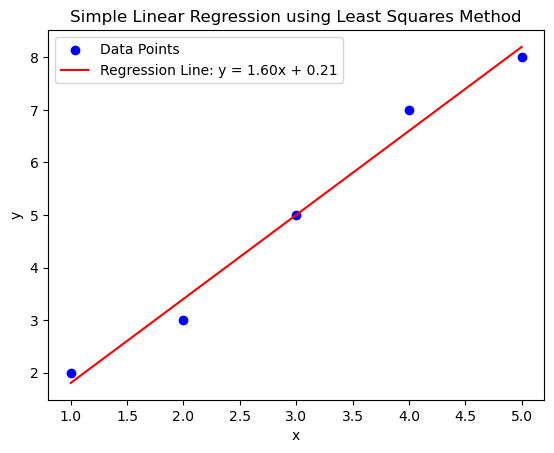

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Given data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 8])

# Number of data points
n = len(x)

# Hyperparameters
learning_rate = 0.05
epochs = 200  # Number of iterations

# Initialize m (slope) and c (intercept) to zero
m = 0
c = 0

# Store history of m and c for plotting
m_history = [m]
c_history = [c]

# Gradient Descent Function
for epoch in range(epochs):
    y_pred = m * x + c  # Predicted values
    
    # Calculate the gradients
    dm = (-2/n) * np.sum(x * (y - y_pred))
    dc = (-2/n) * np.sum(y - y_pred)
    
    # Update parameters
    m -= learning_rate * dm
    c -= learning_rate * dc
    
    # Store values for plotting
    m_history.append(m)
    c_history.append(c)
    
    # Print values every 20 epochs
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch + 1}: m = {m:.4f}, c = {c:.4f}")

# Plotting the data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plotting the regression line
plt.plot(x, m * x + c, color='red', label=f'Regression Line: y = {m:.2f}x + {c:.2f}')

# Labeling the axes
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Linear Regression using Least Squares Method')

# Adding a legend
plt.legend()

# Display the plot
plt.show()